In [4]:
import sys 
import numpy as np
import pandas as pd
import sklearn
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
import math
import datetime
import os
import json
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
input_training = pd.read_csv('training.csv')
input_validation = pd.read_csv('validation.csv')

In [3]:
input_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              2100 non-null   int64  
 1   cast                  2100 non-null   object 
 2   crew                  2100 non-null   object 
 3   budget                2100 non-null   int64  
 4   genres                2100 non-null   object 
 5   homepage              955 non-null    object 
 6   keywords              2100 non-null   object 
 7   original_language     2100 non-null   object 
 8   original_title        2100 non-null   object 
 9   overview              2100 non-null   object 
 10  production_companies  2100 non-null   object 
 11  production_countries  2100 non-null   object 
 12  release_date          2100 non-null   object 
 13  revenue               2100 non-null   int64  
 14  runtime               2100 non-null   float64
 15  spoken_languages     

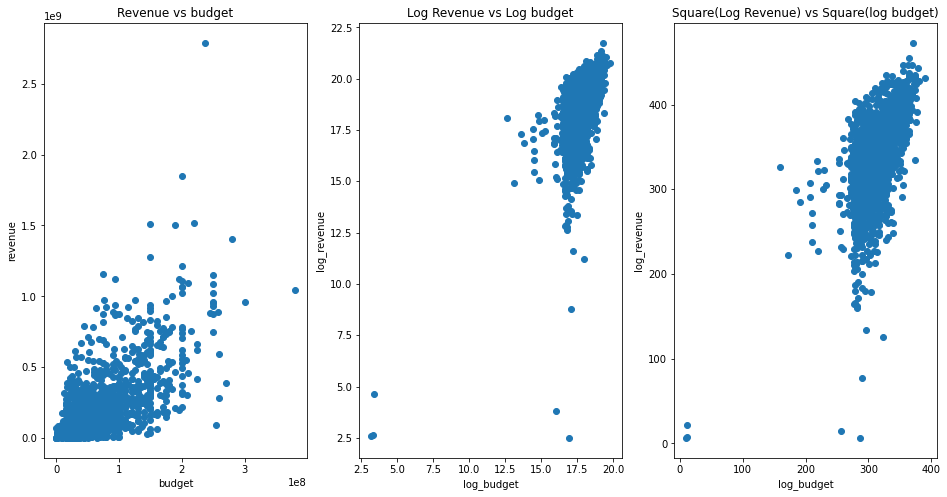

In [19]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.scatter(input_training['budget'], input_training['revenue'])
plt.title('Revenue vs budget');
plt.xlabel('budget')
plt.ylabel('revenue')

plt.subplot(1, 3, 2)
plt.scatter(np.log(input_training['budget']), np.log(input_training['revenue']))
plt.xlabel('log_budget')
plt.ylabel('log_revenue')
plt.title('Log Revenue vs Log budget');

plt.subplot(1, 3, 3)
plt.scatter((np.log(input_training['budget']))**2, np.log(input_training['revenue'])**2)
plt.xlabel('log_budget')
plt.ylabel('log_revenue')
plt.title('Square(Log Revenue) vs Square(log budget)');

In [26]:
def get_json_names(x):
    json_data = json.loads(x)
    list_genres = []
    for token in json_data:
        list_genres.append(token['name'])
    return list_genres

temp = input_training[['movie_id','revenue','genres']].copy()
temp['genres'] = temp['genres'].apply(lambda x: get_json_names(x))
genres_list = list(temp['genres'].apply(pd.Series).stack().value_counts().index)[:10]

In [27]:
genres_list

['Drama',
 'Action',
 'Comedy',
 'Thriller',
 'Adventure',
 'Crime',
 'Romance',
 'Science Fiction',
 'Family',
 'Fantasy']

In [28]:
temp['genres'].apply(pd.Series).stack().value_counts()

Drama              832
Action             756
Comedy             726
Thriller           653
Adventure          568
Crime              348
Romance            333
Science Fiction    329
Family             315
Fantasy            297
Mystery            186
Animation          172
Horror             155
History            102
War                 78
Music               59
Western             30
Documentary          3
dtype: int64